In [722]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [723]:
airline = pd.read_csv(r"airline_passenger_satisfaction.csv")

<div style="background-color: #00aeef ; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>AIRLINE SATISFACTION ANALYSIS</strong></h1>
</div>

<img src="https://www.jainaviation.com/Admin/Upload/icon/web_img_6_2_2020_13_17_12.jpg" width=1200>

<div style="background-color: #6dbee3; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Exploratory Data Analysis (EDA)</strong></h1>
</div>

In [727]:
airline.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [728]:
airline.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,Satisfied


In [729]:
airline.shape

(129880, 24)

In [730]:
airline.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [731]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

<div style="background-color: #6dbee3; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Checking Null Values</strong></h1>
</div>

In [733]:
airline.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

<Figure size 1000x600 with 0 Axes>

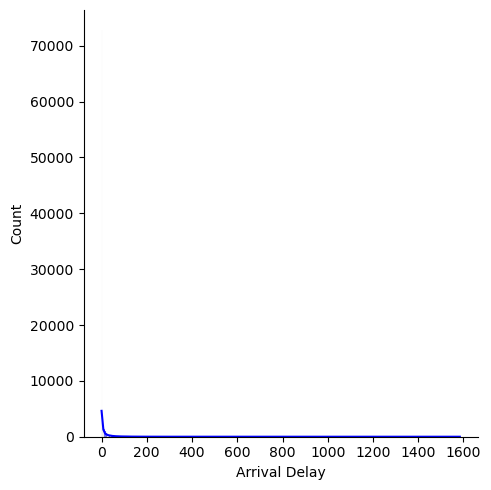

In [734]:
plt.figure(figsize = (10,6))
sns.displot(data=airline,x='Arrival Delay',kde=True,color='blue')

<div style="background-color: #6dbee3; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>filling null values didn't change the distribution</strong></h1>
</div>

In [736]:
fill_list = airline['Arrival Delay'].dropna()
airline['Arrival Delay'] = airline['Arrival Delay'].fillna(pd.Series(np.random.choice(fill_list , size = len(airline.index))))

<Figure size 1000x600 with 0 Axes>

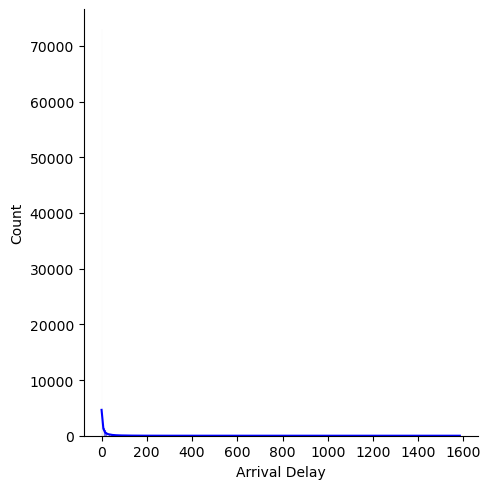

In [737]:
plt.figure(figsize = (10,6))
sns.displot(data=airline,x='Arrival Delay',kde=True,color='blue')

In [738]:
airline.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [739]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

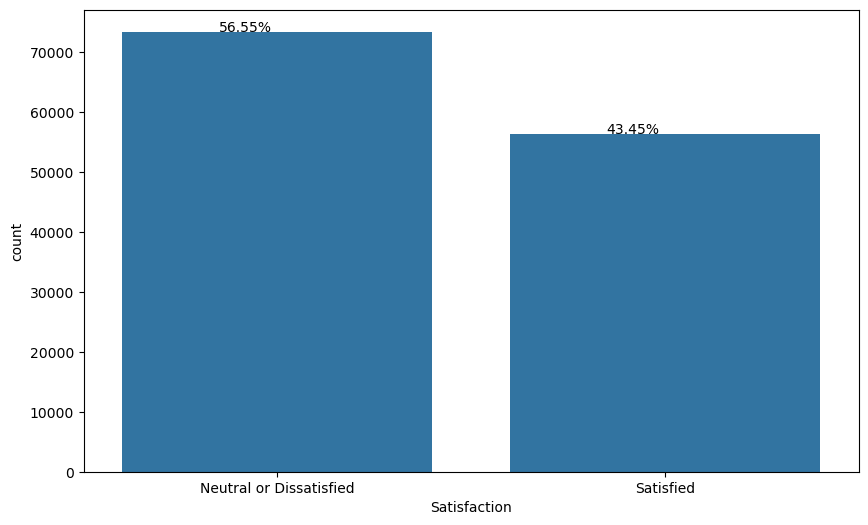

In [740]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=airline,x='Satisfaction')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/airline.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

<div style="background-color: #6dbee3; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Nearly the same percentage of males and females</strong></h1>
</div>

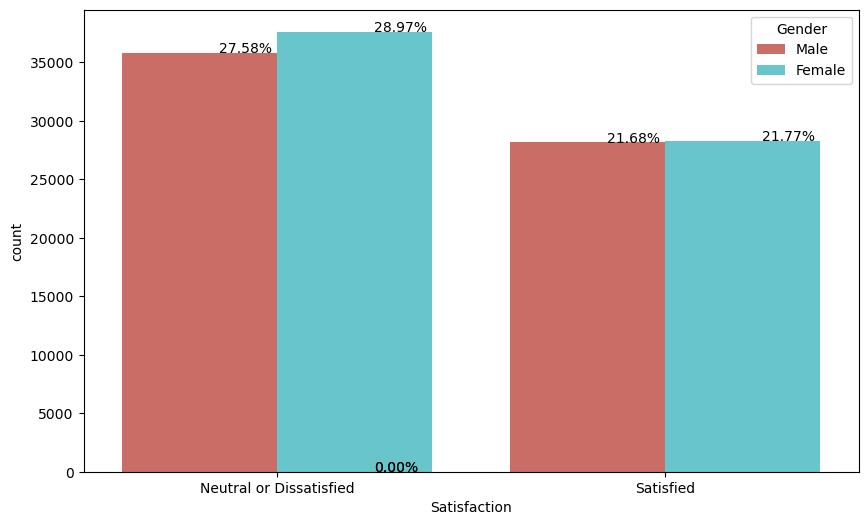

In [742]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=airline,x='Satisfaction',hue='Gender',palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/airline.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

The gender doesn't affect the passengers satisfaction 


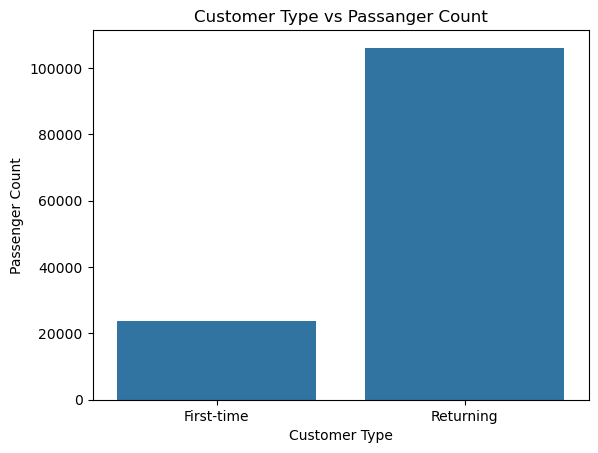

In [744]:
sns.countplot(data=airline,x='Customer Type')
plt.title('Customer Type vs Passanger Count')
plt.xlabel('Customer Type')
plt.ylabel('Passenger Count')
plt.show()


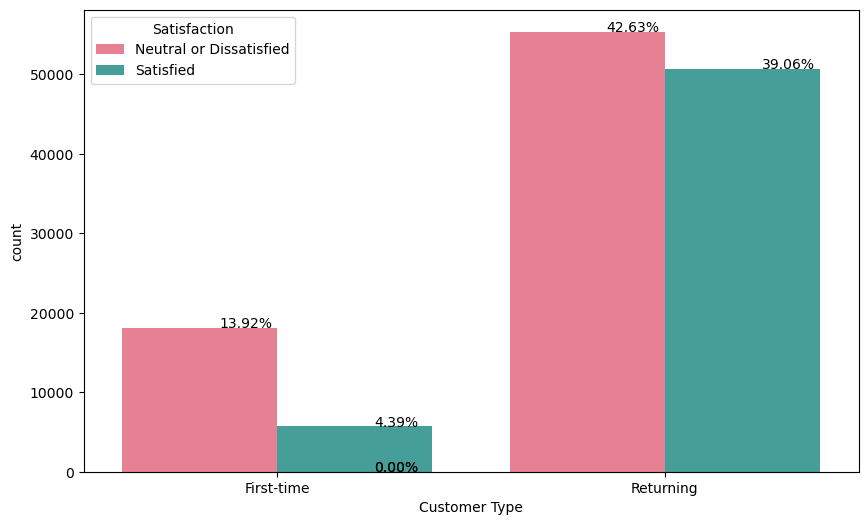

In [745]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=airline,x='Customer Type',hue='Satisfaction',palette='husl')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/airline.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()


First_time customers tend to be dissatisfied a little bit more than returning customers 

<Figure size 1000x600 with 0 Axes>

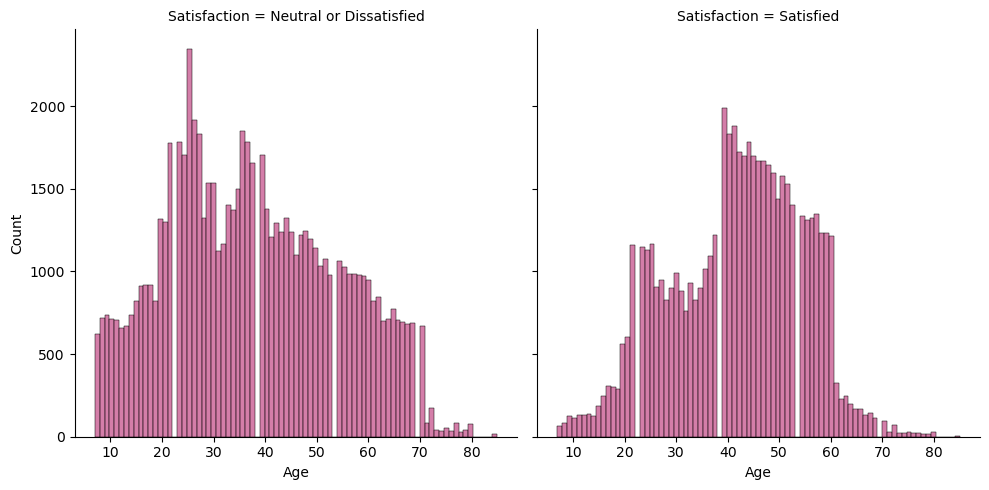

In [747]:
plt.figure(figsize = (10,6))
sns.displot(data=airline,x='Age',col='Satisfaction',color='#c6538c')
plt.show()

-people aged from 20 to 30 and 33 to 40  tend to be more dissatisfied while people aged from 40 to 60 tend to be more satisf
-customers aged between 60 and 70 tend to be more disatsfied

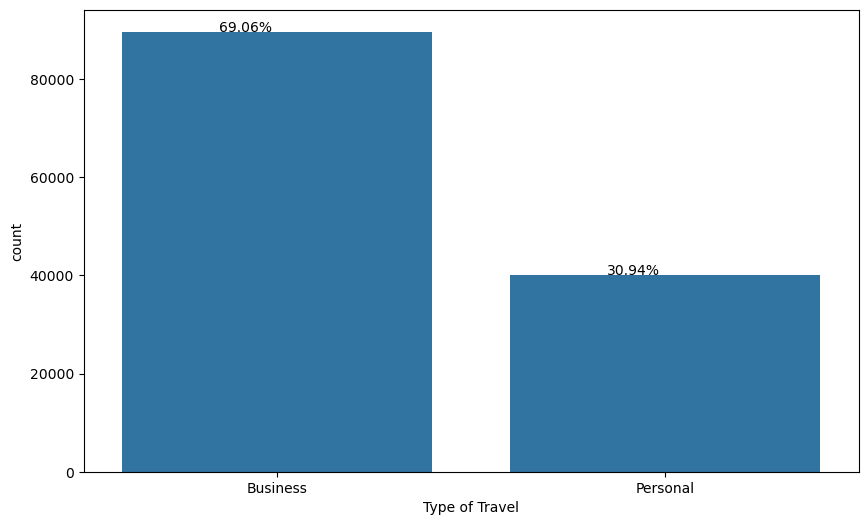

In [749]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=airline,x='Type of Travel')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/airline.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))

plt.show()

<Figure size 1000x600 with 0 Axes>

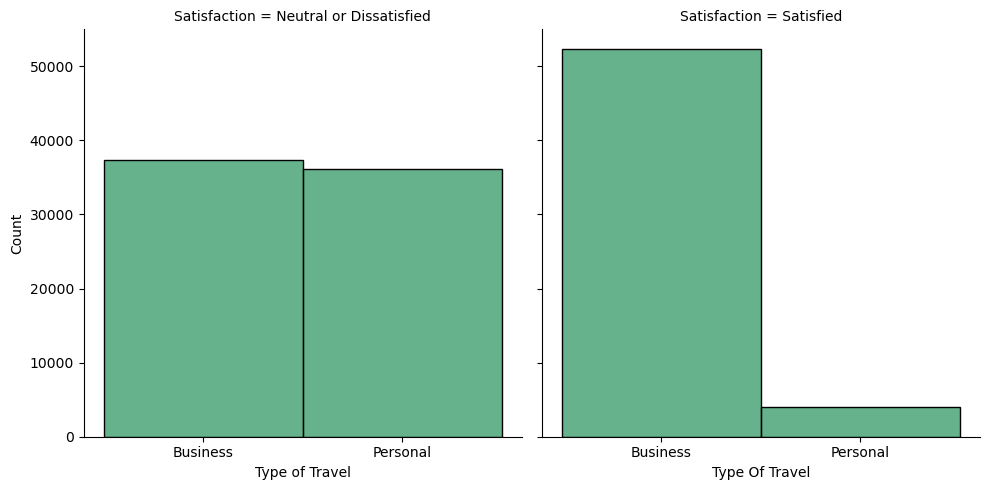

In [750]:
plt.figure(figsize = (10,6))
sns.displot(data=airline,x='Type of Travel',col='Satisfaction',color='#339966')
plt.xlabel('Type Of Travel')
plt.ylabel('Passenger Count')
plt.show()

#### Customers who have business type of travel tend to be way more satisfied than those who have personal type of travel

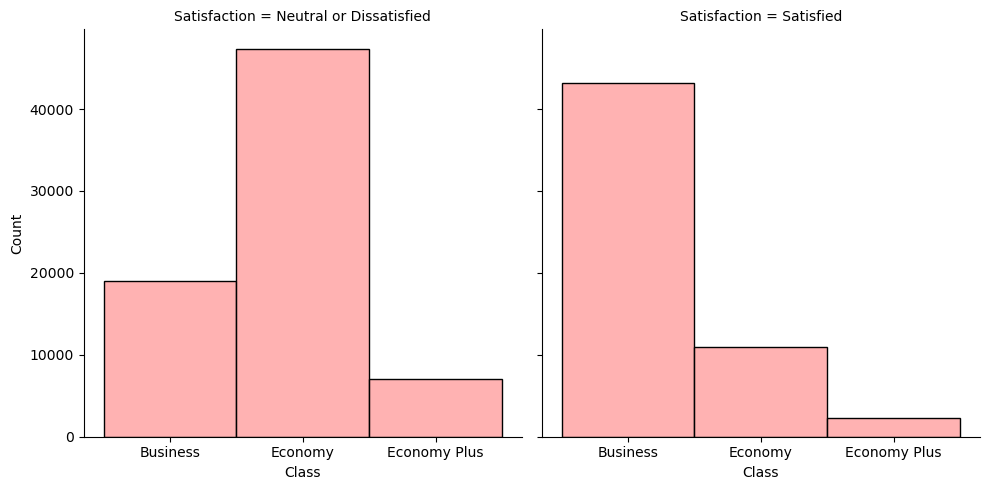

In [756]:
sns.displot(data=airline,x='Class',col='Satisfaction',color='#ff9999')
plt.xlabel('class')
plt.ylabel('Passenger Count')
plt.show()

### Most of the dissatisfied people had economy class while most of the satisfied people had business class

In [758]:
airline.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

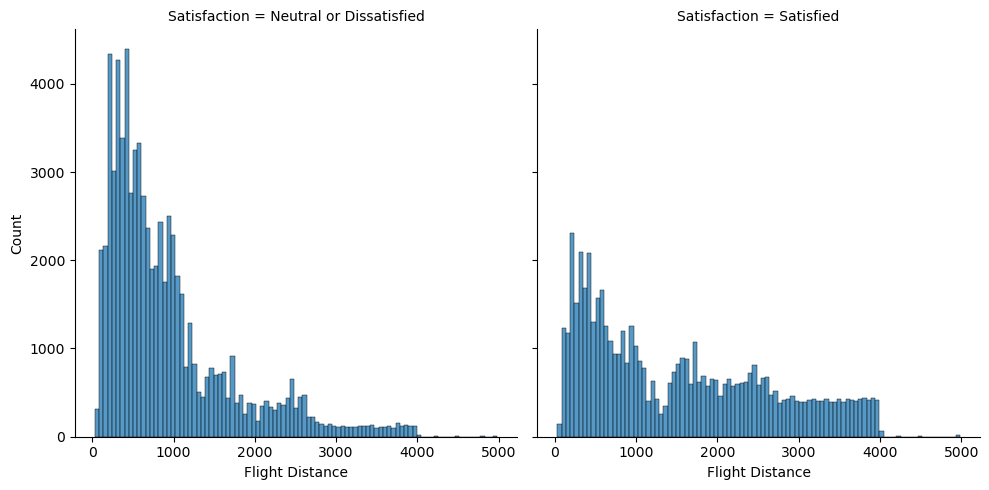

In [759]:
sns.displot(data=airline,x='Flight Distance',col='Satisfaction')

In [760]:
import warnings
warnings.filterwarnings('ignore')

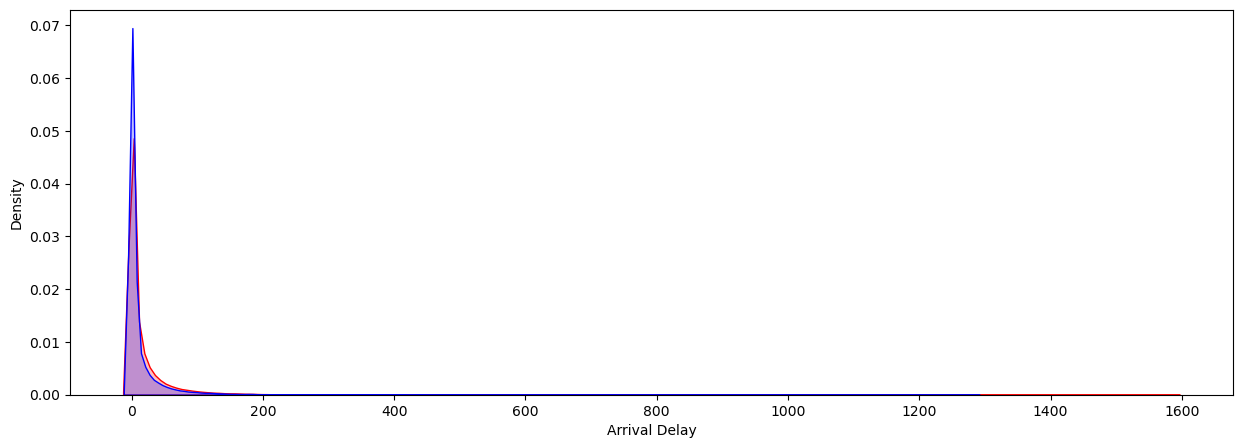

In [761]:
fig = plt.figure(figsize=(15,5))
ax=sns.kdeplot(airline.loc[(airline['Satisfaction'] == 'Neutral or Dissatisfied'), 'Arrival Delay'] , color='r',shade=True)
ax=sns.kdeplot(airline.loc[(airline['Satisfaction'] == 'Satisfied'),'Arrival Delay'] , color='b',shade=True)

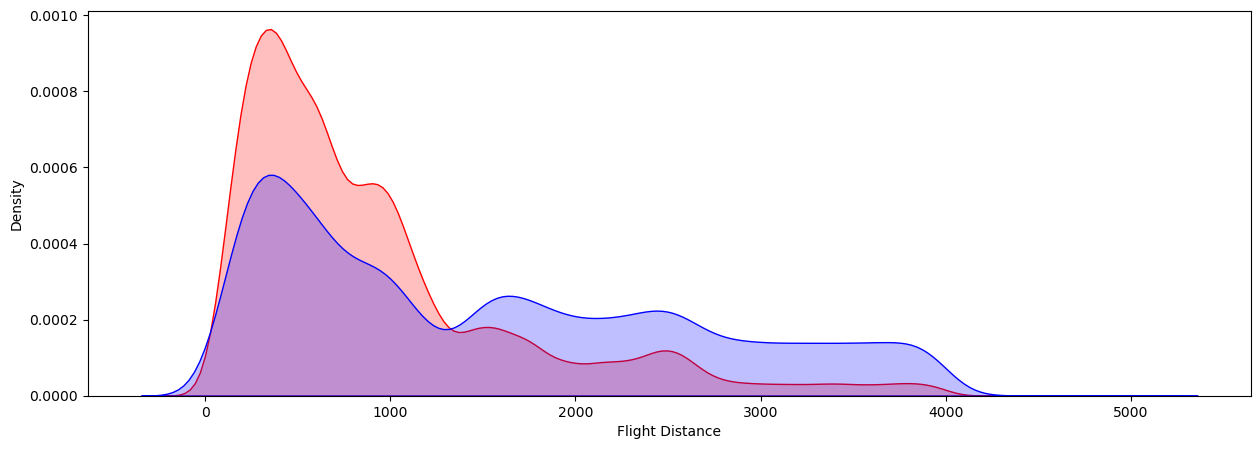

In [762]:
fig = plt.figure(figsize=(15,5))
ax=sns.kdeplot(airline.loc[(airline['Satisfaction'] == 'Neutral or Dissatisfied'), 'Flight Distance'] , color='r',shade=True)
ax=sns.kdeplot(airline.loc[(airline['Satisfaction'] == 'Satisfied'),'Flight Distance'] , color='b',shade=True)

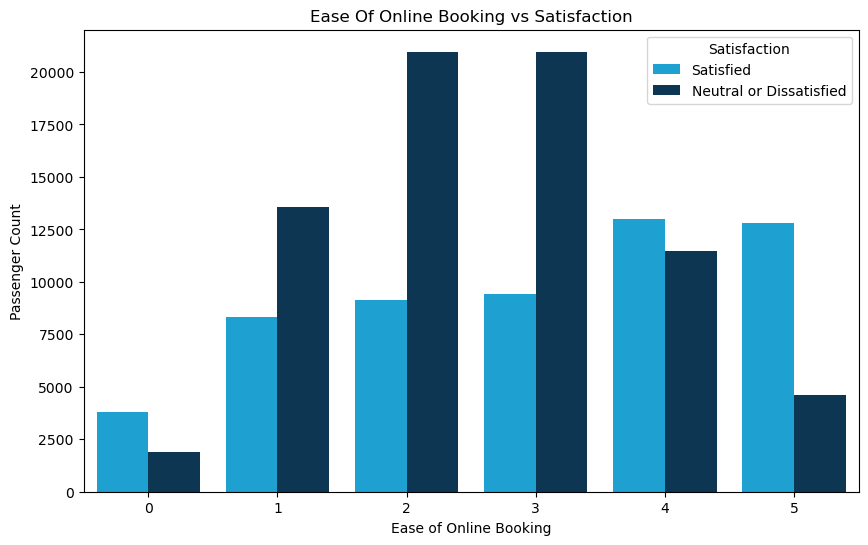

In [763]:
plt.figure(figsize = (10,6))
custom_palette = ['#00aeef', '#00395d']
sns.countplot(data=airline,x='Ease of Online Booking',hue='Satisfaction',palette=custom_palette)
plt.title('Ease Of Online Booking vs Satisfaction')
plt.ylabel('Passenger Count')
plt.show()

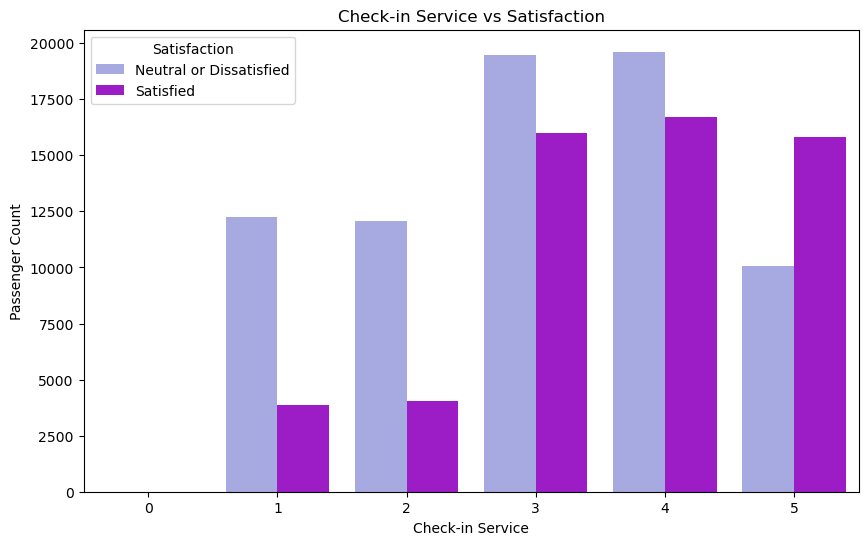

In [764]:
plt.figure(figsize = (10,6))
custom_palette = ['#9da2ea', '#aa00e2']
sns.countplot(data=airline,x='Check-in Service',hue='Satisfaction',palette=custom_palette)
plt.title('Check-in Service vs Satisfaction')
plt.ylabel('Passenger Count')
plt.show()

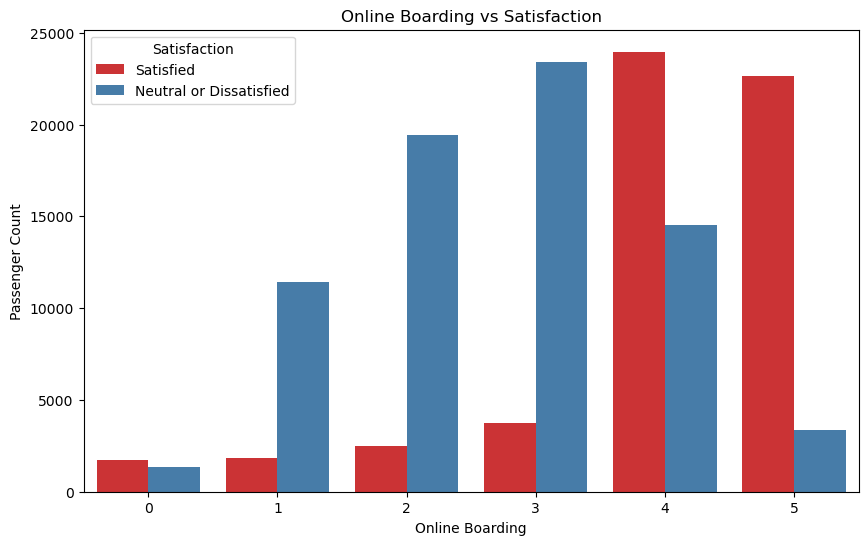

In [765]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='Online Boarding',hue='Satisfaction',palette='Set1')
plt.title('Online Boarding vs Satisfaction')
plt.ylabel('Passenger Count')
plt.show()

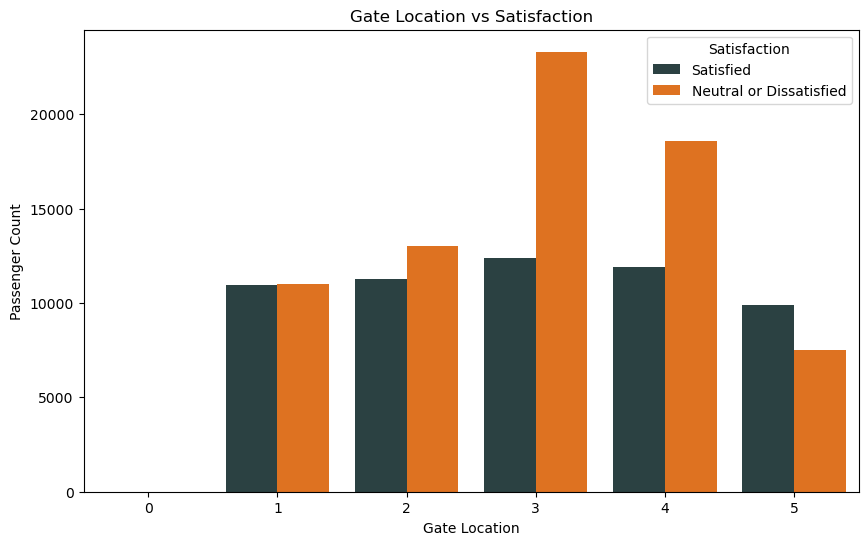

In [766]:
custom_palette = ['#274546', '#fe6d01']
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='Gate Location',hue='Satisfaction',palette=custom_palette)
plt.title('Gate Location vs Satisfaction')
plt.ylabel('Passenger Count')
plt.show()

### satsfaction level of gate location doesn't seem to affect satisfaction level of the airline

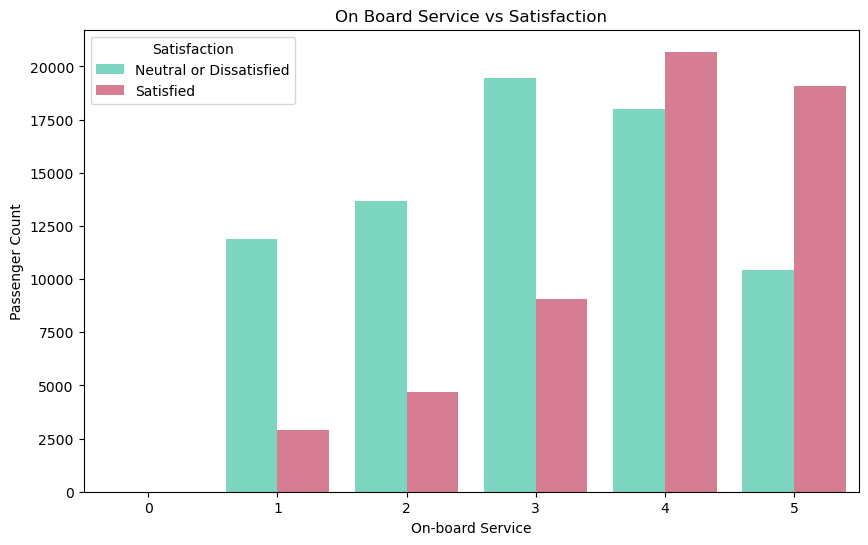

In [768]:
plt.figure(figsize = (10,6))
custom_palette = ['#6ee5c7', '#e56e8c']
sns.countplot(data=airline,x='On-board Service',hue='Satisfaction',palette=custom_palette)
plt.title('On Board Service vs Satisfaction')
plt.ylabel('Passenger Count')
plt.show()

### The more satisfied the customer with On-board Service the more satisfied with the airline 

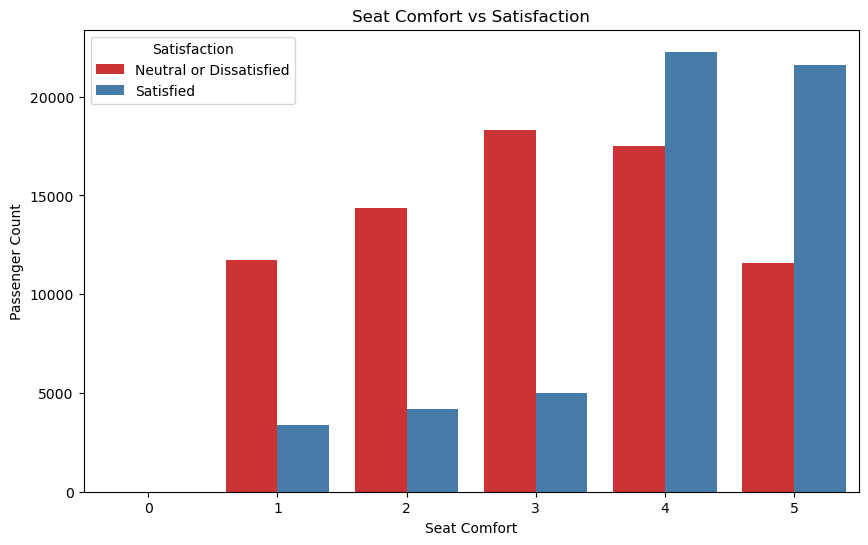

In [770]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='Seat Comfort',hue='Satisfaction',palette='Set1')
plt.title('Seat Comfort vs Satisfaction')
plt.ylabel('Passenger Count')
plt.show()

### The more satisfied the customer with Seat Comfort the more satisfied with the airline 

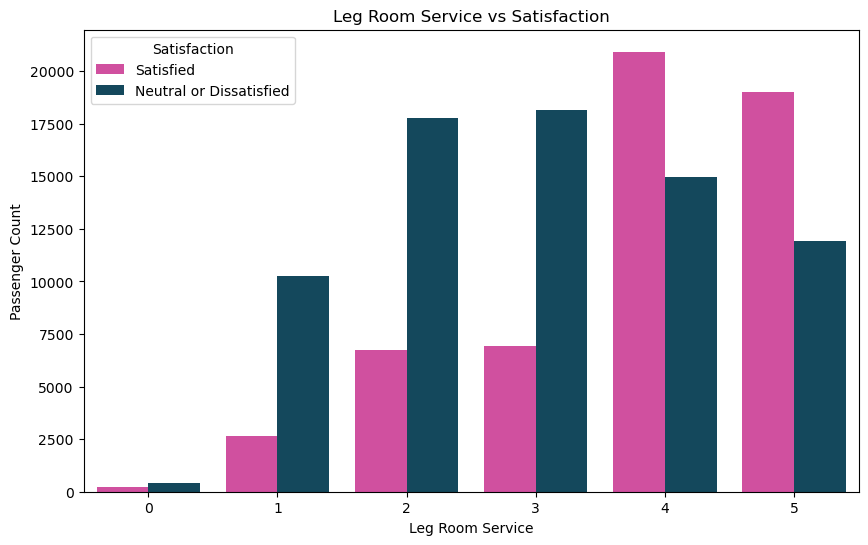

In [772]:
plt.figure(figsize = (10,6))
custom_palette = ['#e53ba4', '#084d68']
sns.countplot(data=airline,x='Leg Room Service',hue='Satisfaction',palette=custom_palette)
plt.title('Leg Room Service vs Satisfaction')
plt.ylabel('Passenger Count')
plt.show()

### The more satisfied the customer with Leg Room Service the more satisfied with the airline 

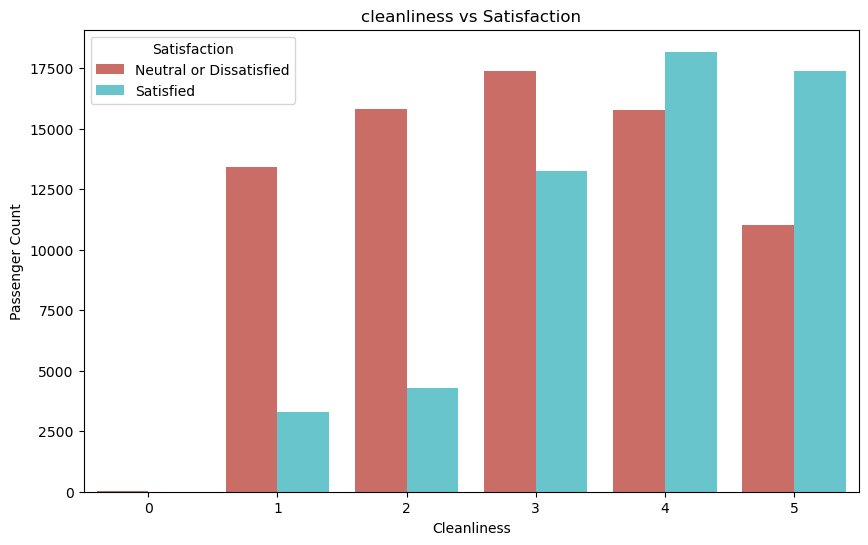

In [774]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='Cleanliness',hue='Satisfaction',palette='hls')
plt.title('cleanliness vs Satisfaction')
plt.ylabel('Passenger Count')
plt.show()

### The more satisfied the customer with Cleanliness the more satisfied with the airline 

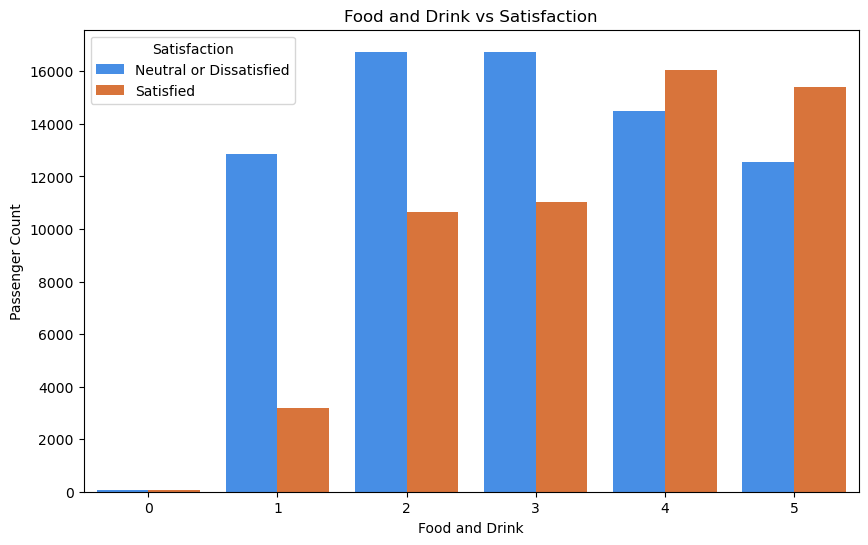

In [776]:
plt.figure(figsize = (10,6))
custom_palette = ['#2d8cff', '#f26d21']
sns.countplot(data=airline,x='Food and Drink',hue='Satisfaction',palette=custom_palette)
plt.title('Food and Drink vs Satisfaction')
plt.ylabel('Passenger Count')
plt.show()

### The more satisfied the customer with Food and Drink the more satisfied with the airline 

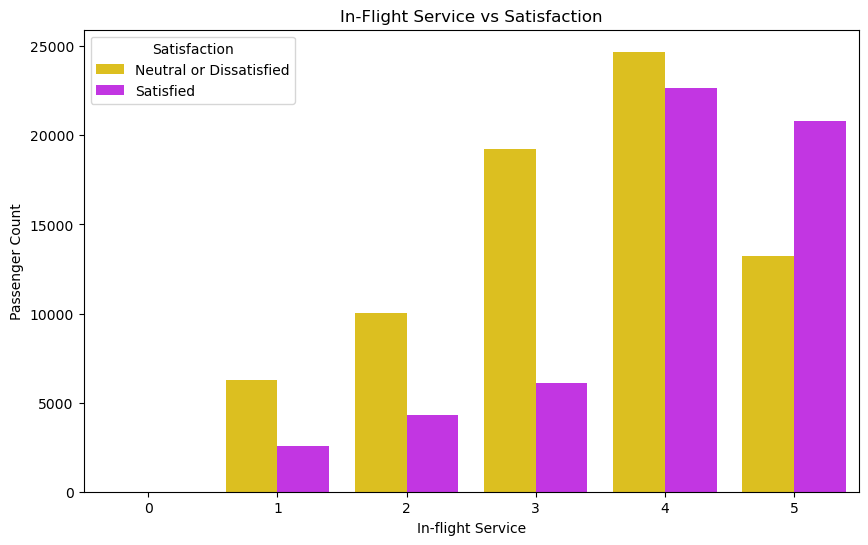

In [778]:
plt.figure(figsize = (10,6))
custom_palette = ['#fbd501', '#d419ff']
sns.countplot(data=airline,x='In-flight Service',hue='Satisfaction',palette=custom_palette)
plt.title('In-Flight Service vs Satisfaction')
plt.ylabel('Passenger Count')
plt.show()

### The more satisfied the customer with In-flight Service the more satisfied with the airline 

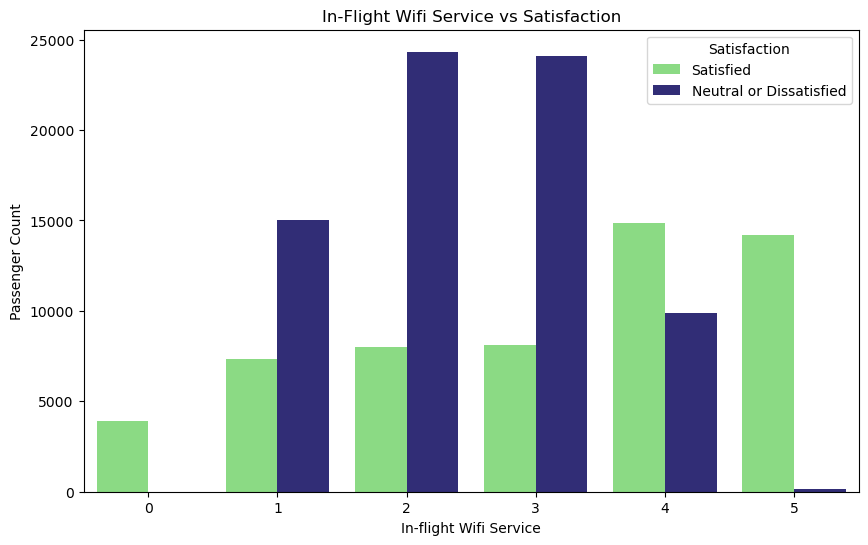

In [780]:
plt.figure(figsize = (10,6))
custom_palette = ['#7fe876', '#262182']
sns.countplot(data=airline,x='In-flight Wifi Service',hue='Satisfaction',palette=custom_palette)
plt.title('In-Flight Wifi Service vs Satisfaction')
plt.ylabel('Passenger Count')
plt.show()

### The more satisfied the customer with In-flight Wifi Service the more satisfied with the airline 

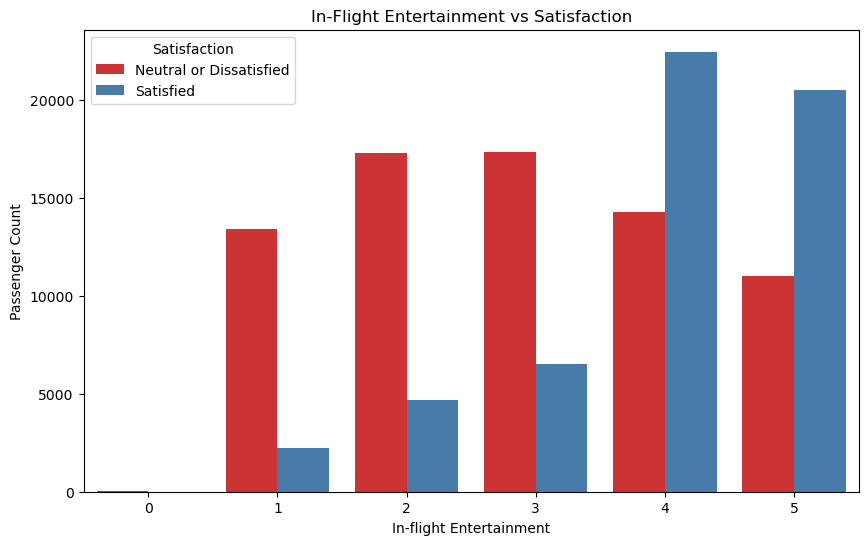

In [782]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='In-flight Entertainment',hue='Satisfaction',palette='Set1')
plt.title('In-Flight Entertainment vs Satisfaction')
plt.ylabel('Passenger Count')
plt.show()

### The more satisfied the customer with In-flight Entertainment the more satisfied with the airline 

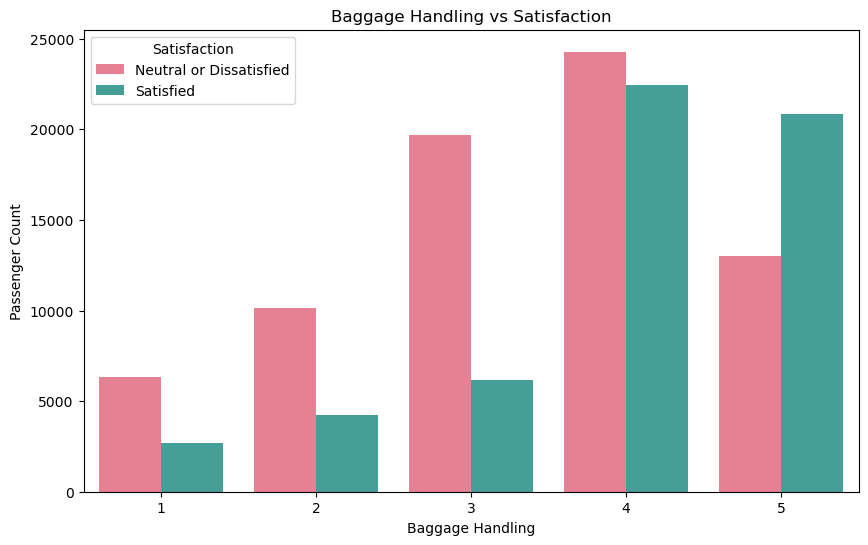

In [784]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='Baggage Handling',hue='Satisfaction',palette='husl')
plt.title('Baggage Handling vs Satisfaction')
plt.ylabel('Passenger Count')
plt.show()

### The more satisfied the customer with one of the following features the more satisfied in general 
##### ('Departure and Arrival Time Convenience', 'Ease of Online Booking','Check-in Service', 'Online Boarding','On-board Service'
##### 'Seat Comfort', 'Leg Room Service', 'Cleanliness','Food and Drink', 'In-flight Service', 'In-flight Wifi Service'
##### 'In-flight Entertainment' ,and 'Baggage Handling')


<div style="background-color: #6dbee3; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Encoding</strong></h1>
</div>

In [787]:
airline['Gender'].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [788]:
airline['Customer Type'].value_counts()

Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64

In [789]:
airline['Type of Travel'].value_counts()

Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64

In [790]:
airline['Class'].value_counts()

Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

In [791]:
airline['Satisfaction'].value_counts()

Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64

In [792]:
from sklearn.preprocessing import LabelEncoder

In [793]:
gender_le=LabelEncoder()
Customer_Type_le=LabelEncoder()
Type_of_Travel=LabelEncoder()
Class=LabelEncoder()
Satisfaction=LabelEncoder()

In [794]:
#convert categorial data to numeric
airline['Gender']=gender_le.fit_transform(airline['Gender'])
airline['Customer Type']=Customer_Type_le.fit_transform(airline['Customer Type'])
airline['Type of Travel']=Type_of_Travel.fit_transform(airline['Type of Travel'])
airline['Class']=Class.fit_transform(airline['Class'])
airline['Satisfaction']=Satisfaction.fit_transform(airline['Satisfaction'])

In [795]:
airline.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,0,0,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,0,0,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,0,0,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,0,0,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,0,0,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1
5,6,1,43,1,0,0,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,1
6,7,1,43,1,0,0,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,1
7,8,0,60,1,0,0,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,1
8,9,1,50,1,0,0,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,0
9,10,0,38,1,0,0,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,1


In [796]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  int32  
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  int32  
 4   Type of Travel                          129880 non-null  int32  
 5   Class                                   129880 non-null  int32  
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

<div style="background-color: #6dbee3; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Outliers</strong></h1>
</div>

<div style="background-color: #6dbee3; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Detect Outliers</strong></h1>
</div>

ID                                            Axes(0.125,0.77;0.168478x0.11)
Gender                                     Axes(0.327174,0.77;0.168478x0.11)
Age                                        Axes(0.529348,0.77;0.168478x0.11)
Customer Type                              Axes(0.731522,0.77;0.168478x0.11)
Type of Travel                               Axes(0.125,0.638;0.168478x0.11)
Class                                     Axes(0.327174,0.638;0.168478x0.11)
Flight Distance                           Axes(0.529348,0.638;0.168478x0.11)
Departure Delay                           Axes(0.731522,0.638;0.168478x0.11)
Arrival Delay                                Axes(0.125,0.506;0.168478x0.11)
Departure and Arrival Time Convenience    Axes(0.327174,0.506;0.168478x0.11)
Ease of Online Booking                    Axes(0.529348,0.506;0.168478x0.11)
Check-in Service                          Axes(0.731522,0.506;0.168478x0.11)
Online Boarding                              Axes(0.125,0.374;0.168478x0.11)

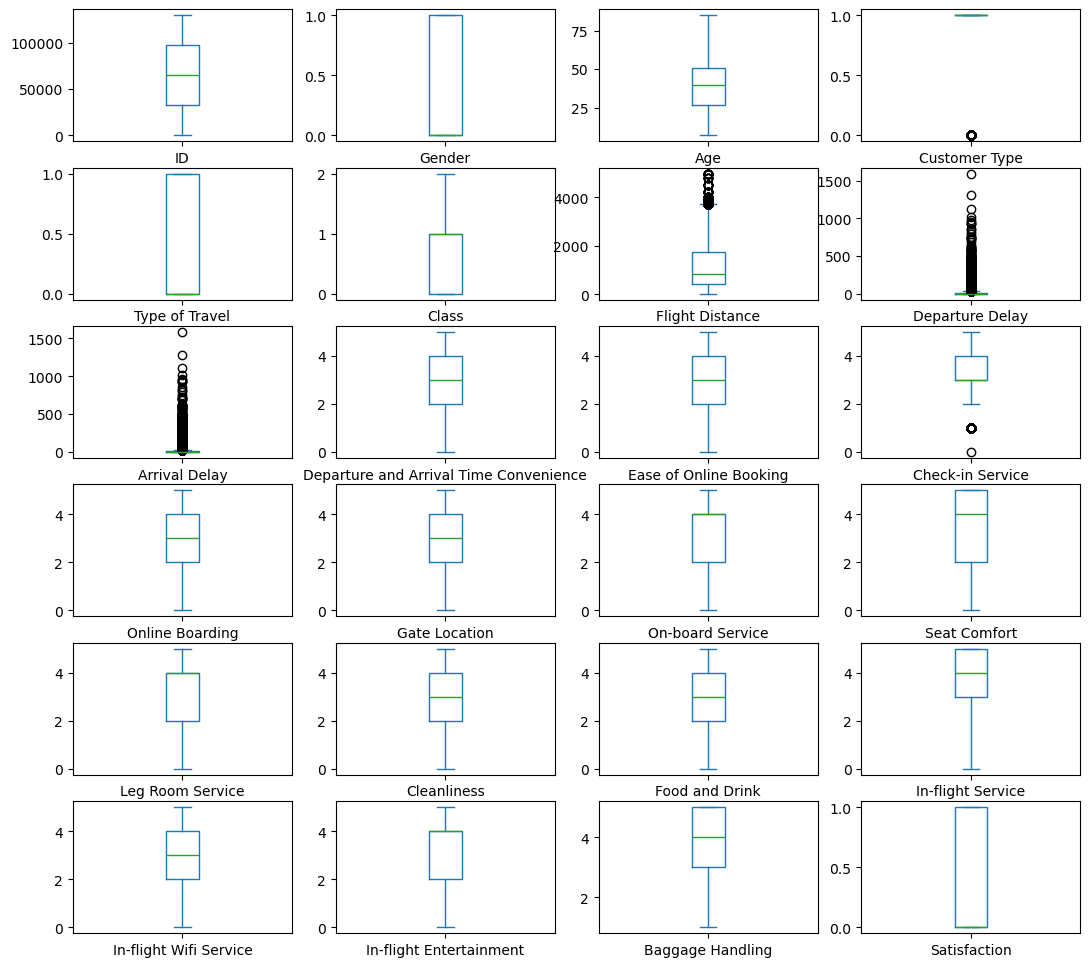

In [799]:
airline.plot(kind="box", subplots=True, layout=(6,4), figsize=(13,12))

<div style="background-color: #6dbee3; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Removing Outliers</strong></h1>
</div>

In [801]:
airline.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

<div style="background-color: #6dbee3; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Removing Flight Distance Ouliers </strong></h1>
</div>

### Distribution Before Removing Outliers 

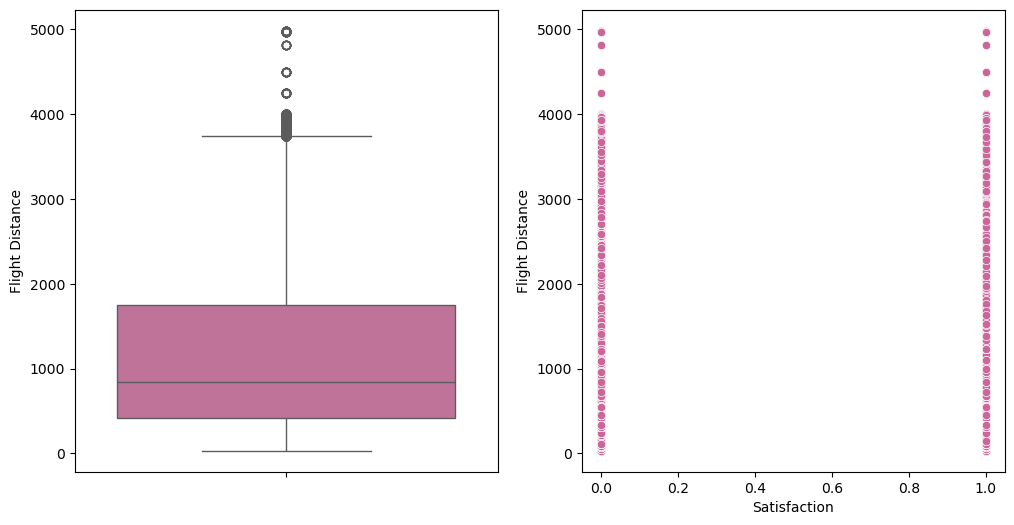

In [804]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Flight Distance',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Flight Distance',color='#cc6699')
plt.show()

In [805]:
x=airline[airline['Flight Distance']>4000]
x.shape

(78, 24)

In [806]:
airline=airline[airline['Flight Distance']<=4000]

### Distribution After Removing Outliers 

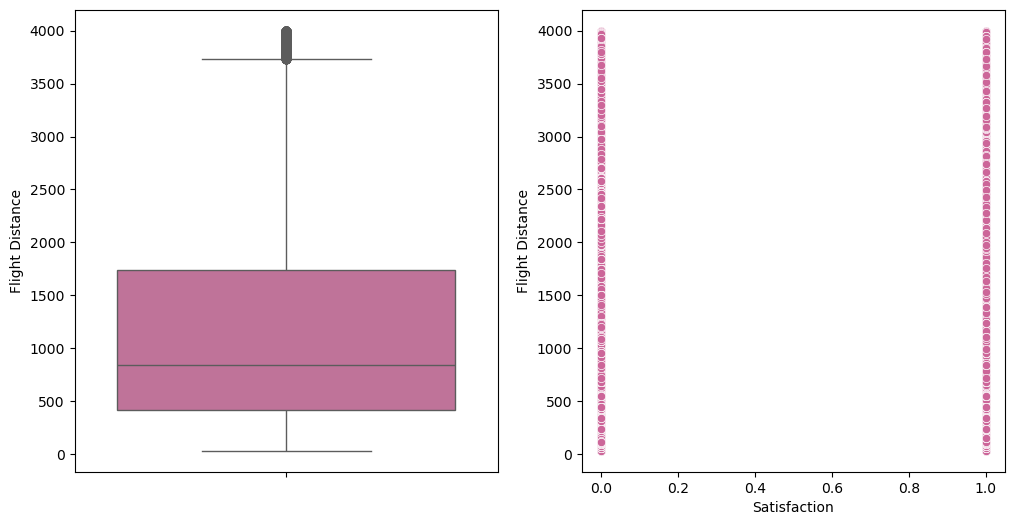

In [808]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Flight Distance',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Flight Distance',color='#cc6699')
plt.show()

<div style="background-color: #6dbee3; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Removing Departure Delays Ouliers </strong></h1>
</div>

### Distribution Before Removing Outliers 

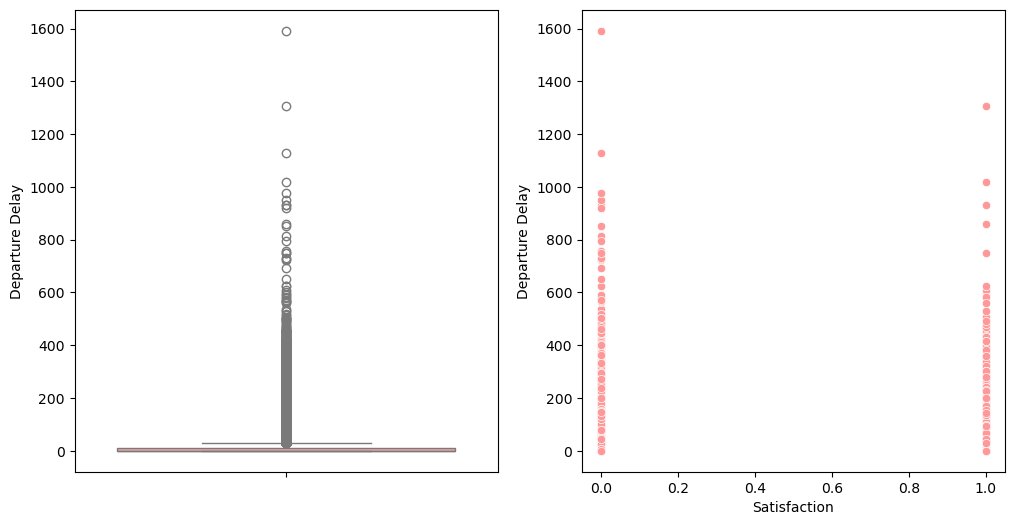

In [811]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Departure Delay',color='#ff9999')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Departure Delay',color='#ff9999')
plt.show()

In [812]:

x=airline[airline['Departure Delay']>600]
x.shape

(24, 24)

In [813]:
airline=airline[airline['Departure Delay']<=600]

### Distribution After Removing Outliers 

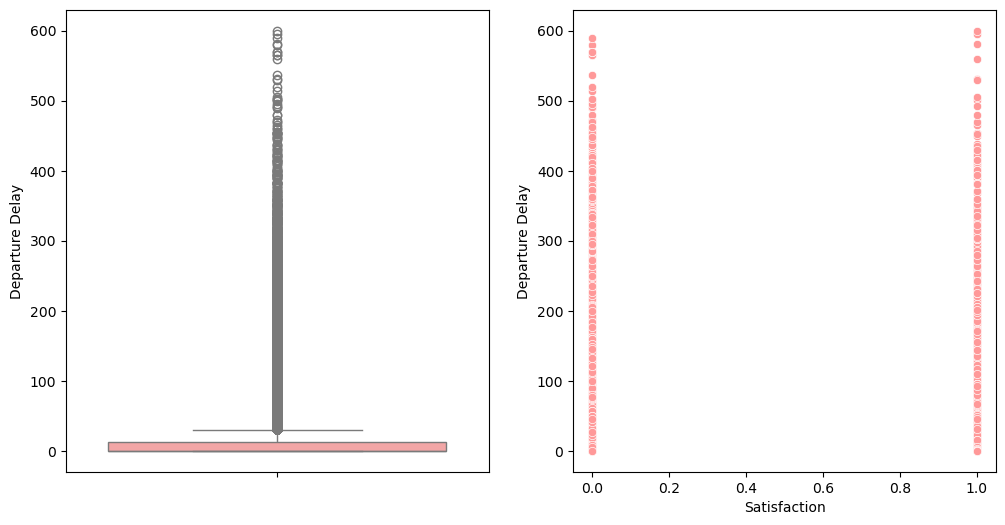

In [815]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Departure Delay',color='#ff9999')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Departure Delay',color='#ff9999')
plt.show()

<div style="background-color: #6dbee3; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Removing Arrival Delays Ouliers </strong></h1>
</div>

### Distribution Before Removing Outliers 

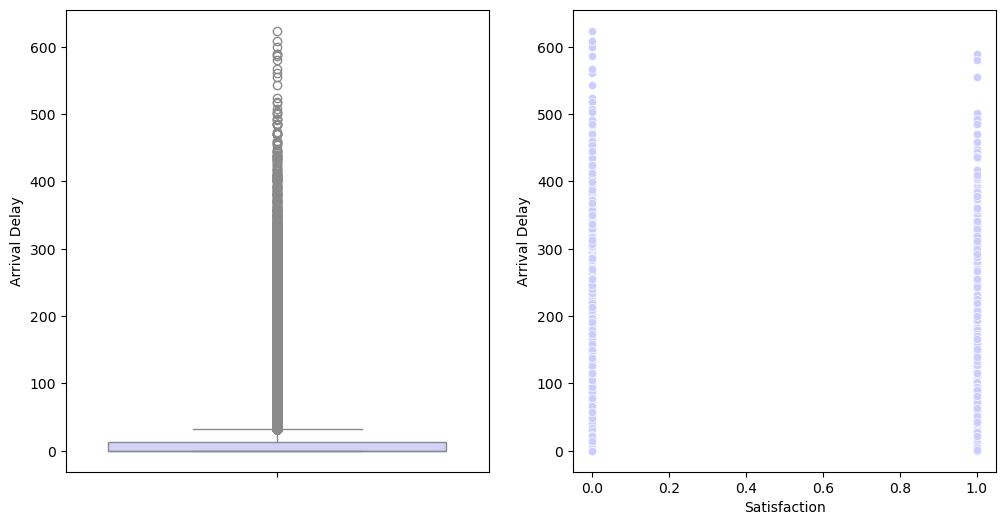

In [818]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Arrival Delay',color='#ccccff')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Arrival Delay',color='#ccccff')
plt.show()

In [819]:
x=airline[airline['Arrival Delay']>=500]
x.shape

(18, 24)

In [820]:
airline=airline[airline['Arrival Delay']<500]

### Distribution After Removing Outliers 

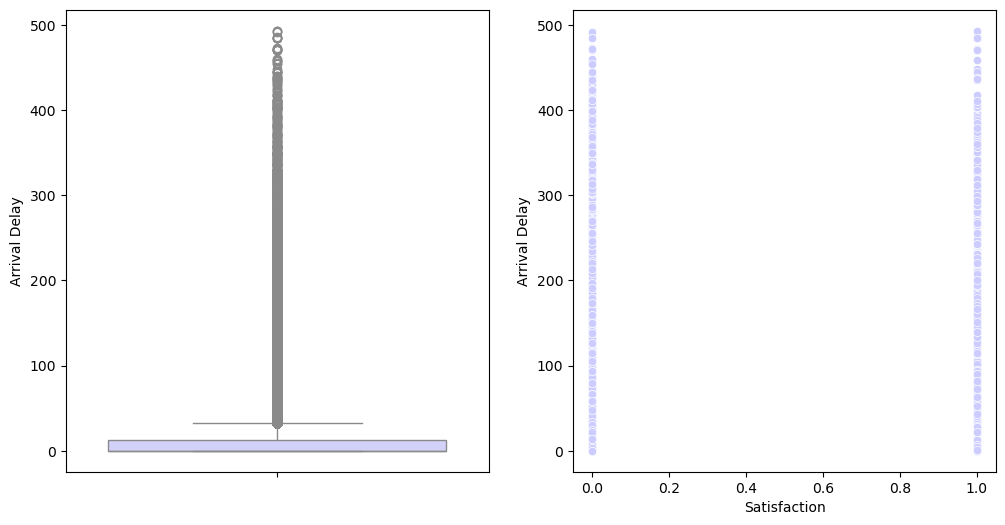

In [822]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Arrival Delay',color='#ccccff')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Arrival Delay',color='#ccccff')
plt.show()

### Removing Outliers Didn't Change The Distribution

In [824]:
airline.shape

(129760, 24)

In [825]:
airline.drop('ID',axis=1,inplace=True)

In [826]:
airline.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [827]:
airline.drop('Gate Location',axis=1,inplace=True)
airline.drop('Gender',axis=1,inplace=True)
airline.drop('Flight Distance',axis=1,inplace=True)
airline.drop('Departure Delay',axis=1,inplace=True)
airline.drop('Arrival Delay',axis=1,inplace=True)

<div style="background-color: #6dbee3; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Final Insights </strong></h1>
</div>

✅ Dataset: ~130K records, 24 columns, target = Satisfaction (57% Neutral/Dissatisfied, 43% Satisfied).

✅ Key drivers: Type of Travel, Class, In-flight Entertainment, WiFi Service, Delays.

✅ Business travelers & premium class → higher satisfaction.

✅ Service ratings with 0 values need review; minor missing values (~0.3% in Arrival Delay).

✅ Improving onboard experience + reducing delays → boost satisfaction.

<div style="background-color: #6dbee3; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Recommendation For Airline</strong></h1>
</div>

1️⃣ Enhance Onboard Services → Improve In-flight Entertainment, WiFi, Seat Comfort, and Food & Drink — these are strong drivers of satisfaction.

2️⃣ Minimize Delays → Focus on reducing Departure and Arrival Delays, as delays significantly lower satisfaction.

3️⃣ Leverage Business Travelers → Since Business travelers show higher satisfaction, prioritize loyalty programs and premium services for them.

4️⃣ Upgrade Economy Class Experience → Improve service quality in Economy/Economy Plus to close the satisfaction gap with Business class.

5️⃣ Monitor & Improve First-time Experience → First-time customers report lower satisfaction; focus on seamless booking, boarding, and first impressions.